In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [4]:
df_min=df[df['8']==1]

In [5]:
df_min.to_csv('yeast1_minority_train.csv',index=False)
df_min=pd.read_csv('yeast1_minority_train.csv')

In [6]:
df_majority=df[df['8']==0]
df_majority.to_csv('yeast1_majority_train.csv',index=False)
df_majority=pd.read_csv('yeast1_majority_train.csv')

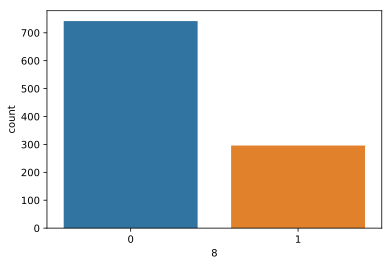

In [7]:
%matplotlib inline
sns.countplot(x='8',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(290, 5, 9)
(290, 9)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(9))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 189       
Total params: 2,589
Trainable params: 2,589
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
174/174 [==============================] - 3s 16ms/step - loss: 0.1375
Epoch 2/1000
174/174 [==============================] - 0s 592us/step - loss: 0.1105
Epoch 3/1000
174/174 [==============================] - 0s 697us/step - loss: 0.0858
Epoch 4/1000
174/174 [==============================] - 0s 677us/step - loss: 0.0646
Epoch 5/1000
174/174 [==============================] - 0s 602us/step - loss: 0.0469
Epoch 6/1000
174/174 [==============================] - 0s 619us/step - loss: 0.0337
Epoch 7/1000
174/174 [==============================] - 0s 547us/step - loss: 0.0251
Epoch 8/1000
174/174 [==============================] - 0s 556us/step - loss: 0.0202
Epoch 9/1000
174/174 [==============================] - 0s 611us/step - loss: 0.0177
Epoch 10/1000
174/174 [==============================] - 0s 533us/step - loss: 0.0170
Epoch 11/1000
174/174 [==============================] - 0s 612us/step - loss: 0.0169
Epoch 12/1000
174/174 [==============================] - 0s 671u

174/174 [==============================] - 0s 599us/step - loss: 0.0158
Epoch 97/1000
174/174 [==============================] - 0s 632us/step - loss: 0.0158
Epoch 98/1000
174/174 [==============================] - 0s 539us/step - loss: 0.0158
Epoch 99/1000
174/174 [==============================] - 0s 542us/step - loss: 0.0158
Epoch 100/1000
174/174 [==============================] - 0s 599us/step - loss: 0.0157
Epoch 101/1000
174/174 [==============================] - 0s 547us/step - loss: 0.0158
Epoch 102/1000
174/174 [==============================] - 0s 553us/step - loss: 0.0158
Epoch 103/1000
174/174 [==============================] - 0s 599us/step - loss: 0.0157
Epoch 104/1000
174/174 [==============================] - 0s 651us/step - loss: 0.0157
Epoch 105/1000
174/174 [==============================] - 0s 570us/step - loss: 0.0157
Epoch 106/1000
174/174 [==============================] - 0s 576us/step - loss: 0.0157
Epoch 107/1000
174/174 [==============================] - 0s 

174/174 [==============================] - 0s 656us/step - loss: 0.0153
Epoch 191/1000
174/174 [==============================] - 0s 599us/step - loss: 0.0152
Epoch 192/1000
174/174 [==============================] - 0s 594us/step - loss: 0.0152
Epoch 193/1000
174/174 [==============================] - 0s 599us/step - loss: 0.0152
Epoch 194/1000
174/174 [==============================] - 0s 606us/step - loss: 0.0152
Epoch 195/1000
174/174 [==============================] - 0s 598us/step - loss: 0.0153
Epoch 196/1000
174/174 [==============================] - 0s 668us/step - loss: 0.0152
Epoch 197/1000
174/174 [==============================] - 0s 594us/step - loss: 0.0153
Epoch 198/1000
174/174 [==============================] - 0s 767us/step - loss: 0.0152
Epoch 199/1000
174/174 [==============================] - 0s 961us/step - loss: 0.0151
Epoch 200/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 201/1000
174/174 [==============================] - 0s

174/174 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 285/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 286/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 287/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 288/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 289/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 290/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 291/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 292/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 293/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 294/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 295/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.

Epoch 379/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 380/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 381/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 382/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 383/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 384/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 385/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 386/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 387/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 388/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 389/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 390/1000
174/174 [==============================] - 0s 1ms/

174/174 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 476/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 477/1000
174/174 [==============================] - 0s 988us/step - loss: 0.0142
Epoch 478/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 479/1000
174/174 [==============================] - 0s 991us/step - loss: 0.0142
Epoch 480/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 481/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 482/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 483/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 484/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 485/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 486/1000
174/174 [==============================] - 0s 1ms/step - loss

174/174 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 571/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 572/1000
174/174 [==============================] - ETA: 0s - loss: 0.013 - 0s 1ms/step - loss: 0.0140
Epoch 573/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 574/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 575/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 576/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 577/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 578/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 579/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 580/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 581/1000
174/174 [==============================] 

174/174 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 666/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 667/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 668/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 669/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 670/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 671/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 672/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 673/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 674/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 675/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 676/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.

174/174 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 761/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 762/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 763/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 764/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 765/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 766/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 767/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 768/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0135A: 0s - loss: 0.01
Epoch 769/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 770/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 771/1000
174/174 [==============================] - 0s 1

174/174 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 856/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 857/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 858/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 859/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 860/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 861/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 862/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 863/1000
174/174 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 864/1000
174/174 [==============================] - 0s 902us/step - loss: 0.0133
Epoch 865/1000
174/174 [==============================] - 0s 738us/step - loss: 0.0132
Epoch 866/1000
174/174 [==============================] - 0s 738us/step - lo

174/174 [==============================] - 0s 841us/step - loss: 0.0131
Epoch 950/1000
174/174 [==============================] - 0s 778us/step - loss: 0.0131
Epoch 951/1000
174/174 [==============================] - 0s 840us/step - loss: 0.0131
Epoch 952/1000
174/174 [==============================] - 0s 759us/step - loss: 0.0131
Epoch 953/1000
174/174 [==============================] - 0s 732us/step - loss: 0.0131
Epoch 954/1000
174/174 [==============================] - 0s 755us/step - loss: 0.0131
Epoch 955/1000
174/174 [==============================] - 0s 761us/step - loss: 0.0132
Epoch 956/1000
174/174 [==============================] - 0s 755us/step - loss: 0.0132
Epoch 957/1000
174/174 [==============================] - 0s 702us/step - loss: 0.0133
Epoch 958/1000
174/174 [==============================] - 0s 720us/step - loss: 0.0132
Epoch 959/1000
174/174 [==============================] - 0s 700us/step - loss: 0.0131
Epoch 960/1000
174/174 [==============================] - 

In [14]:
model.save('yeast1.h5')

In [15]:
Xtrain.shape

(174, 5, 9)

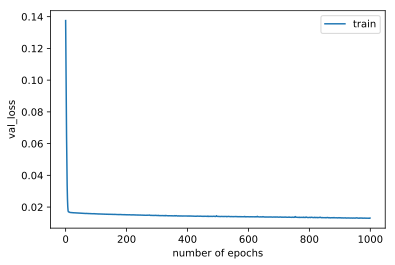

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

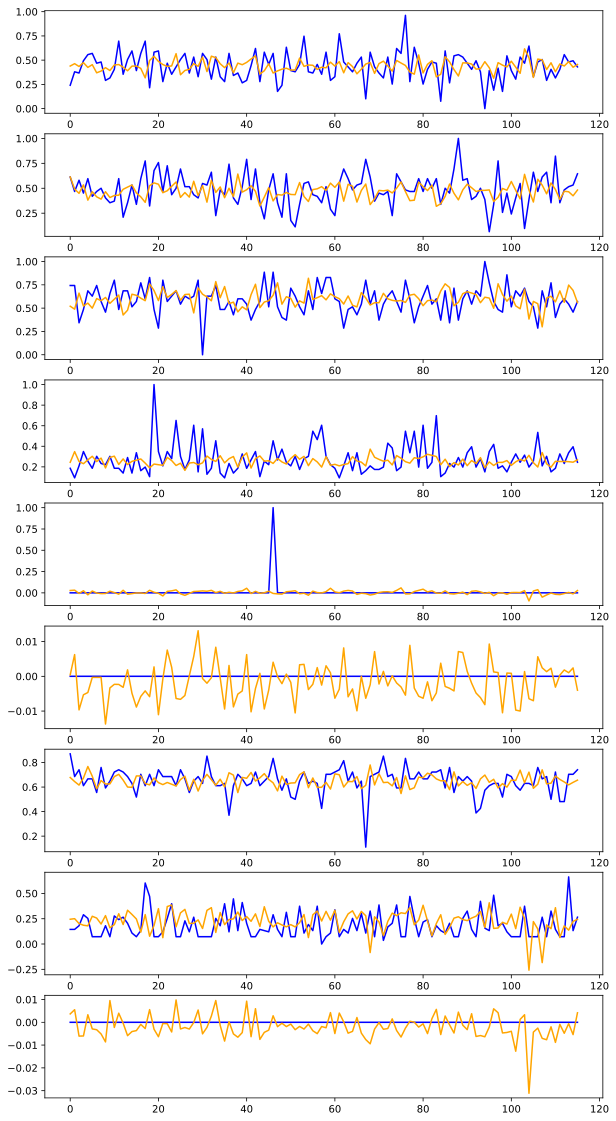

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 4.3918476e-01,  6.1341494e-01,  5.2061939e-01, ...,
         6.7776334e-01,  2.4485224e-01,  3.6714152e-03],
       [ 4.6357900e-01,  4.9219224e-01,  4.8917070e-01, ...,
         6.4465827e-01,  2.5036883e-01,  5.5279210e-03],
       [ 4.3451789e-01,  4.4938803e-01,  6.6124690e-01, ...,
         6.1603630e-01,  2.0246312e-01, -6.0572997e-03],
       ...,
       [ 4.8396364e-01,  4.6517557e-01,  7.4753255e-01, ...,
         6.1793023e-01,  1.3703626e-01, -5.8939308e-04],
       [ 4.2674387e-01,  4.2472357e-01,  6.9049597e-01, ...,
         6.3806129e-01,  2.2388661e-01, -5.3939745e-03],
       [ 4.5527348e-01,  4.8241630e-01,  5.6022555e-01, ...,
         6.5629244e-01,  2.4402973e-01,  4.1868463e-03]], dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

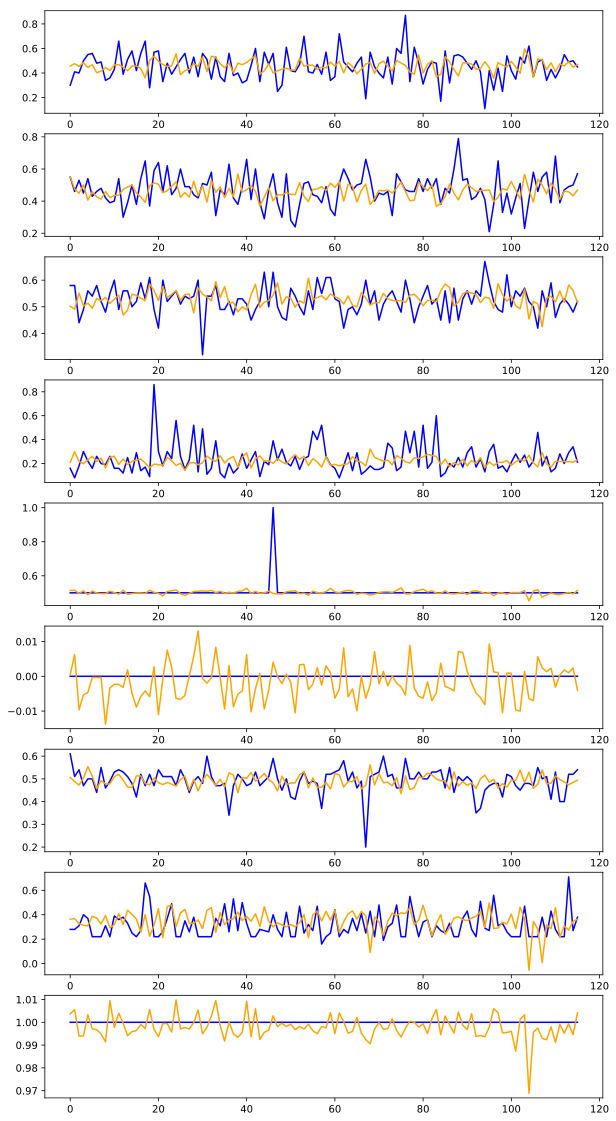

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 4.3918476e-01,  6.1341494e-01,  5.2061939e-01, ...,
         6.7776334e-01,  2.4485224e-01,  3.6714152e-03],
       [ 4.6357900e-01,  4.9219224e-01,  4.8917070e-01, ...,
         6.4465827e-01,  2.5036883e-01,  5.5279210e-03],
       [ 4.3451789e-01,  4.4938803e-01,  6.6124690e-01, ...,
         6.1603630e-01,  2.0246312e-01, -6.0572997e-03],
       ...,
       [ 4.8396364e-01,  4.6517557e-01,  7.4753255e-01, ...,
         6.1793023e-01,  1.3703626e-01, -5.8939308e-04],
       [ 4.2674387e-01,  4.2472357e-01,  6.9049597e-01, ...,
         6.3806129e-01,  2.2388661e-01, -5.3939745e-03],
       [ 4.5527348e-01,  4.8241630e-01,  5.6022555e-01, ...,
         6.5629244e-01,  2.4402973e-01,  4.1868463e-03]], dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)